In [265]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sn

In [267]:
pip install idx2numpy

Note: you may need to restart the kernel to use updated packages.


In [268]:
#Files locations
labels_train_file = '/Users/claireekohler/Downloads/archive/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
images_train_file = '/Users/claireekohler/Downloads/archive/train-images-idx3-ubyte/train-images-idx3-ubyte'
labels_test_file = '/Users/claireekohler/Downloads/archive/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'
images_test_file = '/Users/claireekohler/Downloads/archive/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'

In [271]:
import idx2numpy

labels_train = idx2numpy.convert_from_file(labels_train_file)
images_train = idx2numpy.convert_from_file(images_train_file)
labels_test = idx2numpy.convert_from_file(labels_test_file)
images_test = idx2numpy.convert_from_file(images_test_file)


In [273]:
print(type(labels_train))  # Should output <class 'numpy.ndarray'>
print(type(images_train))  # Should output <class 'numpy.ndarray'>


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [275]:
#Reshape or flatten arrays
def to_csv_train(labels, images):
    n_images, im_size = images_train.shape[:2]
    dataset = images.reshape(n_images, im_size * im_size)

    # Create header for the dataframe:
    header = [str(_ + 1) for _ in range(im_size * im_size)]
    header.append('label')

    return pd.DataFrame(np.concatenate((dataset, labels[:, np.newaxis]), axis=1), columns=header)

def to_csv_test(labels, images):
    n_images, im_size = images_test.shape[:2]
    dataset = images.reshape(n_images, im_size * im_size)

    # Create header for the dataframe:
    header = [str(_ + 1) for _ in range(im_size * im_size)]
    header.append('label')

    return pd.DataFrame(np.concatenate((dataset, labels[:, np.newaxis]), axis=1), columns=header)


#Create CSV dataframes
df_train = to_csv_train(labels_train, images_train)
df_test = to_csv_test(labels_test, images_test)



In [277]:
print(df_train.shape)

(60000, 785)


In [279]:
print(df_test.shape)

(10000, 785)


In [281]:
#Save dataframes as CSV files

import os

output_folder = '/Users/claireekohler/Desktop/Projects/Python'
train_csv_path = os.path.join(output_folder, "train_dataset.csv")
test_csv_path = os.path.join(output_folder, "test_dataset.csv")

df_train.to_csv(train_csv_path, index=False)
df_test.to_csv(test_csv_path, index=False)


In [282]:
print(df_train)

       1  2  3  4  5  6  7  8  9  10  ...  776  777  778  779  780  781  782  \
0      0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
1      0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
2      0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
3      0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
4      0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
...   .. .. .. .. .. .. .. .. ..  ..  ...  ...  ...  ...  ...  ...  ...  ...   
59995  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
59996  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
59997  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
59998  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
59999  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   

       783  784  label  
0        0    

In [285]:
#Standardize Data

train_columns_to_scale = df_train.iloc[:,:-1]
test_columns_to_scale = df_test.iloc[:,:-1]

features_train = StandardScaler().fit_transform(train_columns_to_scale)
features_test = StandardScaler().fit_transform(test_columns_to_scale)

In [286]:
#define labels

train_labels = df_train.iloc[:,-1]
test_labels = df_test.iloc[:,-1]

In [289]:
#Compute covariance matrix

#S = (xT*x)/n

covar_matrix_train = np.matmul(features_train.T, features_train)/60000
covar_matrix_test = np.matmul(features_test.T, features_test)/10000
print(covar_matrix_train.shape)
print(covar_matrix_test.shape)

(784, 784)
(784, 784)


In [290]:
print(covar_matrix_train)
print(covar_matrix_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [293]:
#Compute eigenvalues and eigenvectors of train data

from scipy.linalg import eigh

#returns eigen value is ascending order
values_train, vectors_train = eigh(covar_matrix_train)
vectors_train = vectors_train.T

#number of components to keep
k = 2
u_train = vectors_train[:,:k]

In [295]:
#eigenvalues and eigenvectors of test data
values_test, vectors_test = eigh(covar_matrix_test)
vectors_test = vectors_test.T

k = 2
u_test = vectors_test[:,:k]

In [297]:
#Projected feature coordinates of data in lower dimensionality
#x'=uTX

#graph this

projected_train_data = np.dot(features_train, u_train)
projected_test_data = np.dot(features_test, u_test)

print(projected_train_data)
print(projected_test_data)

[[-0.00470969  0.        ]
 [-0.00470969  0.        ]
 [-0.00470969  0.        ]
 ...
 [-0.00470969  0.        ]
 [-0.00470969  0.        ]
 [-0.00470969  0.        ]]
[[-0.03242608 -0.10449009]
 [-0.03242608 -0.10449009]
 [-0.03242608 -0.10449009]
 ...
 [-0.03242608 -0.10449009]
 [-0.03242608 -0.10449009]
 [-0.03242608  5.67745288]]


In [143]:
#PCA for dimension reduction

from sklearn.decomposition import PCA

pca = PCA()

In [175]:
#PCA on train data

principalComponents_train = pca.fit_transform(features_train)
var_explained_train = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained_train = np.cumsum(var_explained_train)

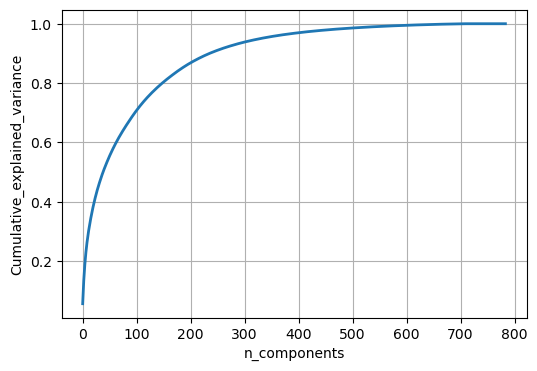

In [178]:
#Plot PCA spectrum

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained_train, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

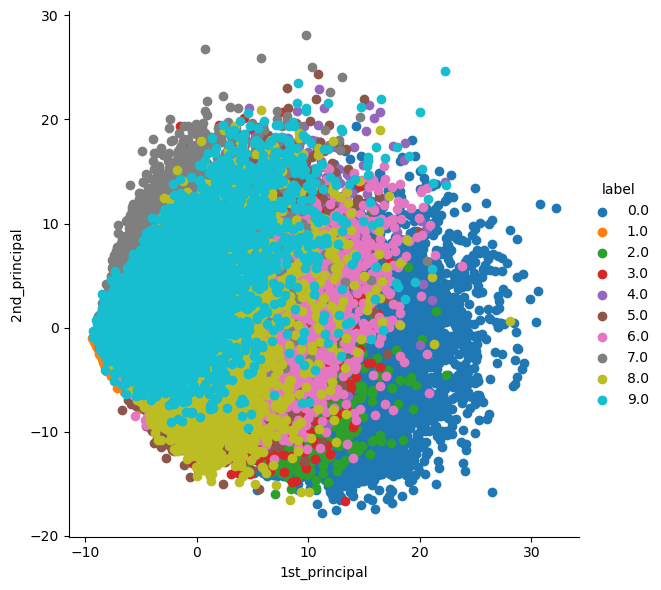

In [206]:
#Visualization of the first 2 components
import seaborn as sn

pca.n_components = 2
#for 2D visualization
principalComponents_train = pca.fit_transform(features_train)

pca_train = np.vstack((principalComponents_train.T, train_labels)).T
pca_df = pd.DataFrame(data=pca_train, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [212]:
#PCA on test data
pca.n_components = 784
principalComponents_test = pca.fit_transform(features_test)
var_explained_test = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained_test = np.cumsum(var_explained_test)

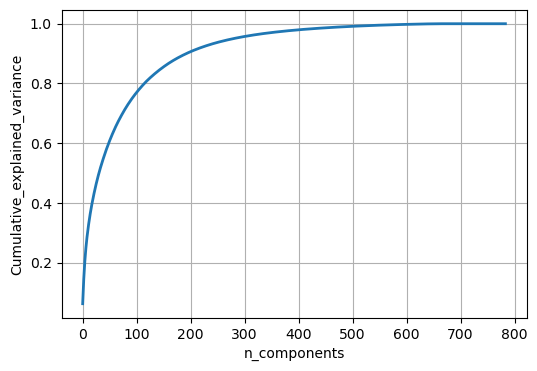

In [214]:
#Plot PCA spectrum

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained_test, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

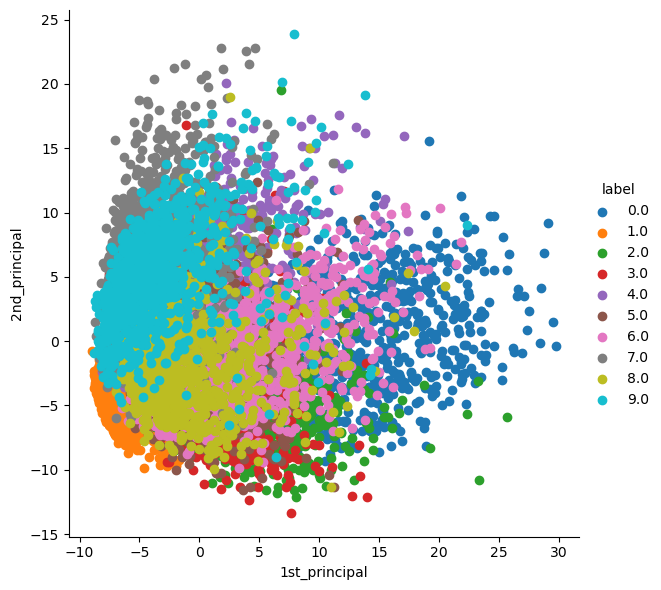

In [216]:
#Visualization of the first 2 components
pca.n_components = 2
#for 2D visualization
principalComponents_test = pca.fit_transform(features_test)

pca_test = np.vstack((principalComponents_test.T, test_labels)).T
pca_df = pd.DataFrame(data=pca_test, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

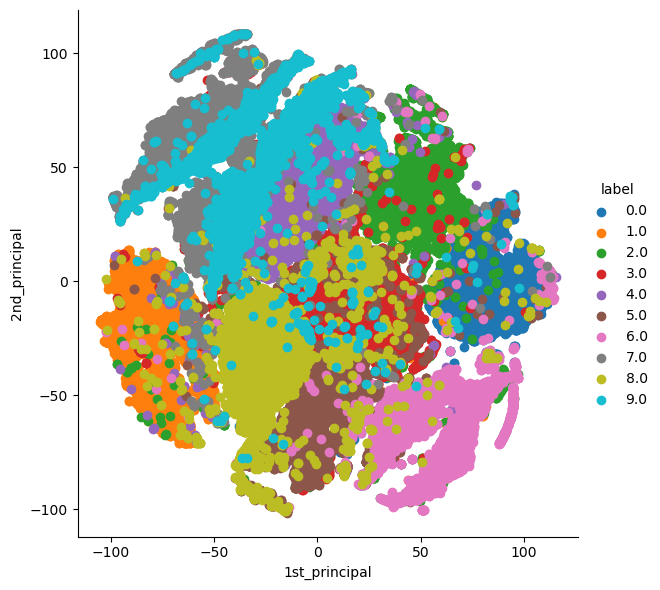

In [219]:
#t-SNE on train set

from sklearn.manifold import TSNE

tsne_model = TSNE(n_components = 2, perplexity = 30, n_iter = 1000, random_state = 42)
tsne_train = tsne_model.fit_transform(features_train)

#Plot 
tsne_data = np.vstack((tsne_train.T, train_labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [220]:
print(tsne_train.shape, labels_train.shape)

(60000, 2) (60000,)


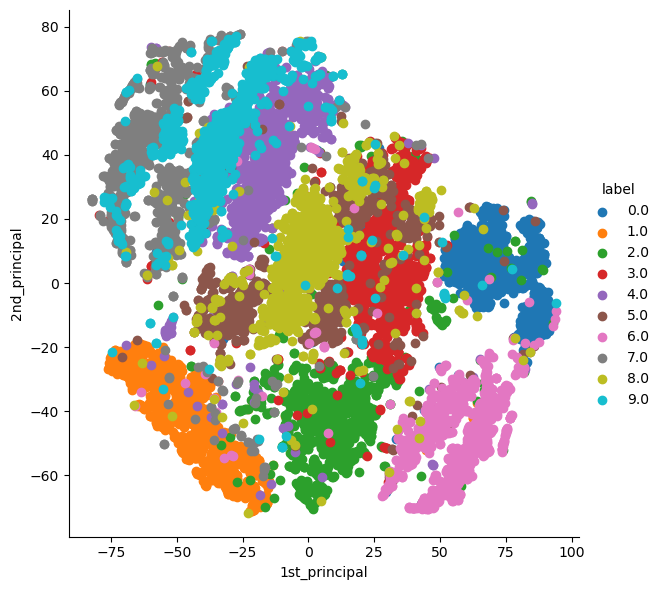

In [233]:
#t-SNE on test set

tsne_test = tsne_model.fit_transform(features_test)

#Plot 
tsne_data = np.vstack((tsne_test.T, test_labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()